당뇨여부판단 데이터
데이터 설명 : 당뇨여부 판단하기 (종속변수 Outcome : 1 당뇨 , 0 :정상)


In [1]:
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_test.csv")
# x_label(평가용) https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv
# 데이터 출처 :https://www.kaggle.com/pritsheta/diabetes-dataset(참고, 데이터 수정)

In [2]:
X_train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,8,126,88,36,108,38.5,0.349,49
1,1,0,74,52,10,36,27.8,0.269,22
2,2,1,140,74,26,180,24.1,0.828,23
3,3,6,162,62,0,0,24.3,0.178,50
4,4,2,94,68,18,76,26.0,0.561,21


In [3]:
y_train

,ID,Outcome
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
609,761,0
610,762,0
611,763,0
612,764,1


In [ ]:
# #EDA
# X_train.describe()
# X_train.info()
# y_train['Outcome'].value_counts()


# #개수
# print(X_train.shape, y_train.shape, X_test.shape)


#X_train의 값의 id는 제거, y_train의 id는 pop
X_train = X_train.drop('ID', axis=1)
y_train_id = y_train.pop('ID')
X_test_id = X_test.pop('ID')
print(X_train.shape,y_train.shape)

#target값
# y_train

#결측치없음


#수치들이 대부분 큰차이가 없어서 굳이 스켈링 할필요 X
#  X_train.head(5)
#object데이터가 없어서 인코딩 할필요 X
# X_train.select_dtypes(include='object')


#데이터 split
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            y_train,
                                            test_size =0.2,
                                            random_state =2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

#모델 ->분류 -> RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2025,class_weight='balanced',max_depth=5,n_estimators =100)
model.fit(X_tr,y_tr)
pred = model.predict(X_val)
pred_proba = model.predict_proba(X_val)

#검증
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
print(f1_score(y_val, pred, average='macro'))
print(recall_score(y_val, pred))
print(precision_score(y_val, pred))
print(roc_auc_score(y_val, pred_proba[:,1]))


#########################roc_auc는 pred_proba를 써야하는데?###### 다시 확인 필요!

#원래
0.7101010101010101
0.5277777777777778
0.6333333333333333
0.7006704980842913

#random_state=2025 추가
0.700487012987013
0.5555555555555556
0.5882352941176471
0.6973180076628352

#class_weight='balanced'추가
0.7230884682731593
0.5555555555555556
0.6451612903225806
0.7145593869731801

#max_depth=5 추가
0.7482756006973394
0.7222222222222222
0.6046511627906976
0.7634099616858238

#n_estimators =100 추가
0.7482756006973394
0.7222222222222222
0.6046511627906976
0.7634099616858238

# #test데이터 최종
pred = model.predict(X_test)
pred

result = pd.DataFrame({
                       "ID" : X_test_id,
                       "pose" : pred
})

result.to_csv("정답.csv", index=False)






(614, 8) (614, 1)
0.7482756006973394
0.7222222222222222


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6046511627906976
0.8381226053639846


0.7634099616858238

In [ ]:
#평가
X_label= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv")

In [ ]:
import pandas as pd
X_label = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv")
print(f1_score(X_label, pred, average='macro'))
print(recall_score(X_label, pred))
print(precision_score(X_label, pred))
print(roc_auc_score(X_label, pred))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

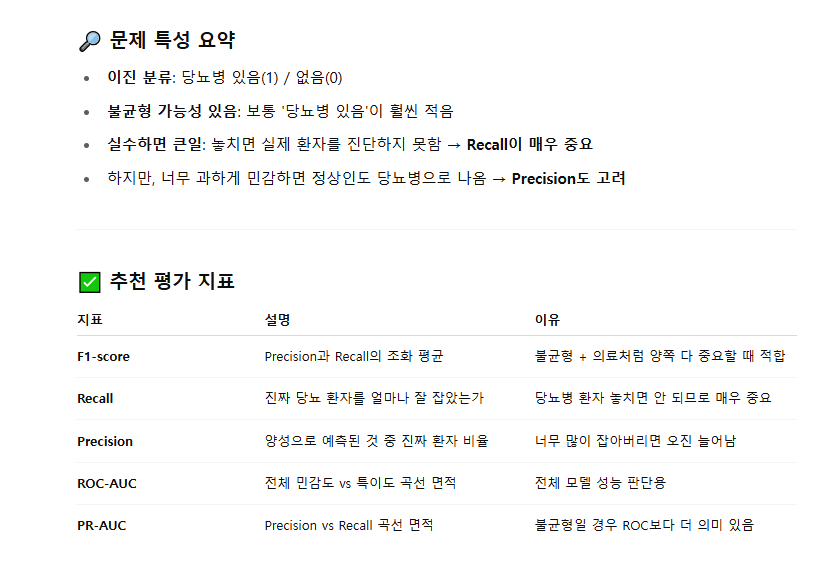

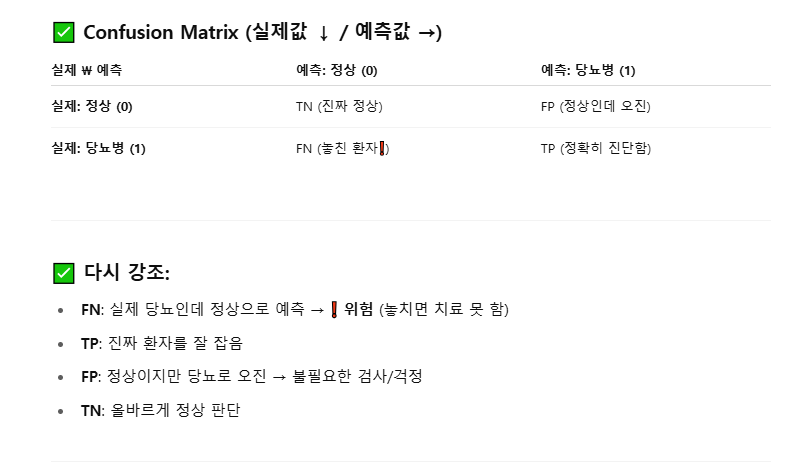

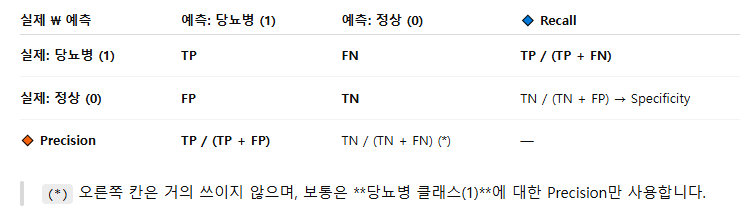

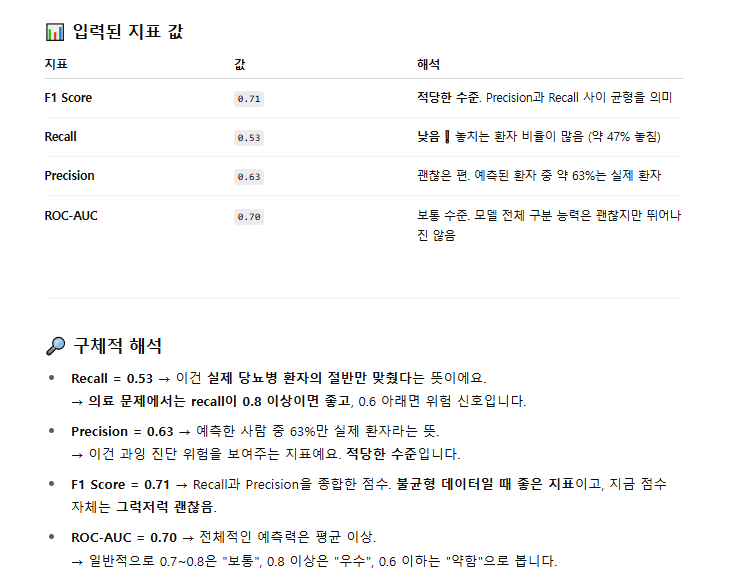

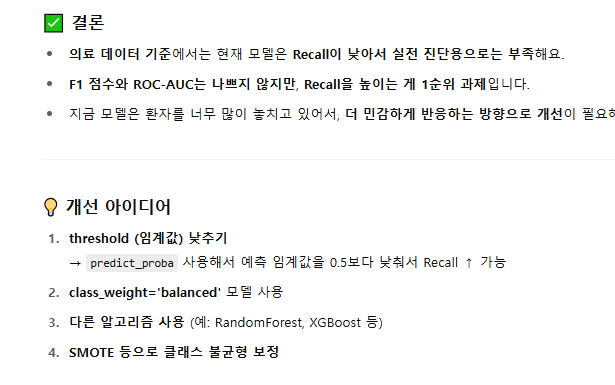

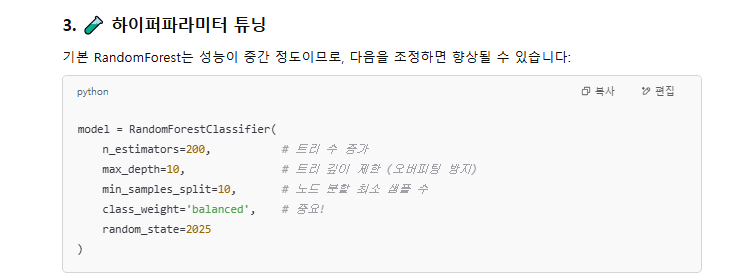

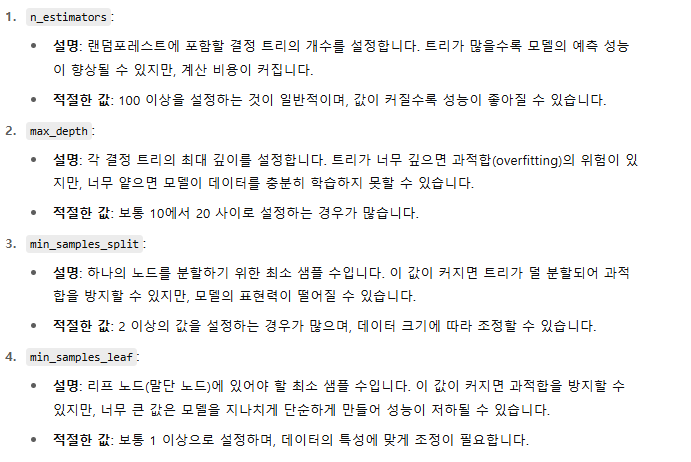

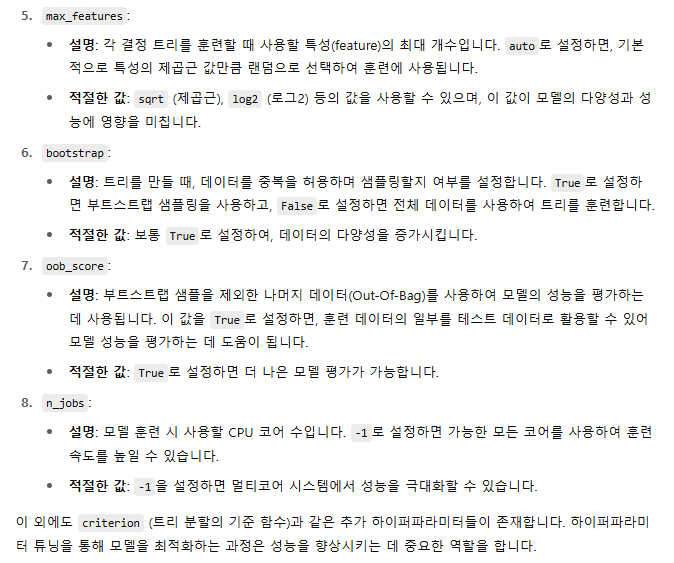

In [ ]:
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_test.csv")
# x_label(평가용) https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv
# 데이터 출처 :https://www.kaggle.com/pritsheta/diabetes-dataset(참고, 데이터 수정)

X_train.select_dtypes(include='object')

""
0
1
2
3
4
...
609
610
611
612


In [ ]:
# #EDA
# X_train.describe()
# X_train.info()
# y_train['Outcome'].value_counts()

# X_train.head()

# #개수
# # print(X_train.shape, y_train.shape, X_test.shape)


# #X_train의 값의 id는 제거, y_train의 id는 pop
# X_train = X_train.drop('ID', axis=1)
# y_train_id = y_train.pop('ID')
# X_test_id = X_test.pop('ID')
# print(X_train.shape,y_train.shape)

#target값
# y_train

#결측치없음


#수치들이 대부분 큰차이가 없어서 굳이 스켈링 할필요 X
#  X_train.head(5)
#object데이터가 없어서 인코딩 할필요 X
# X_train.select_dtypes(include='object')


# #데이터 split
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(X_train,
#                                             y_train,
#                                             test_size =0.2,
#                                             random_state =2025)

# X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

# #모델 ->분류 -> RandomForestClassifier()
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=2025,class_weight='balanced',max_depth=5,n_estimators =100)
# model.fit(X_tr,y_tr)
# pred = model.predict(X_val)
# pred_proba = model.predict_proba(X_val)

# #검증
# from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
# print(f1_score(y_val, pred, average='macro'))
# print(recall_score(y_val, pred))
# print(precision_score(y_val, pred))
# print(roc_auc_score(y_val, pred_proba[:,1]))


# #########################roc_auc는 pred_proba를 써야하는데?###### 다시 확인 필요!

#원래
0.7101010101010101
0.5277777777777778
0.6333333333333333
0.7006704980842913

#random_state=2025 추가
0.700487012987013
0.5555555555555556
0.5882352941176471
0.6973180076628352

#class_weight='balanced'추가
0.7230884682731593
0.5555555555555556
0.6451612903225806
0.7145593869731801

#max_depth=5 추가
0.7482756006973394
0.7222222222222222
# 0.6046511627906976
# 0.7634099616858238

# #n_estimators =100 추가
# 0.7482756006973394
# 0.7222222222222222
# 0.6046511627906976
# 0.7634099616858238

# # #test데이터 최종
# pred = model.predict(X_test)
# pred

# result = pd.DataFrame({
#                        "ID" : X_test_id,
#                        "pose" : pred
# })

# result.to_csv("정답.csv", index=False)






0.7222222222222222